In [1]:
##import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.model_selection import GridSearchCV

from com_in_nitin.utils import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
## import the dataset

data=pd.read_csv("melb_data.csv")

In [3]:
## check the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  float64
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

In [4]:
##lets drop the duplicates records first
data.drop_duplicates(inplace=True)

In [5]:
## as there are many features which indecates the location. we will keep only lattitue and longitude. 
## and drop other location related features

data=data.drop(["Unnamed: 0","Suburb","Address","Regionname","Postcode",],axis=1)

In [6]:
# we need to add another fetaure "Age" which will indecate how old the house is.and then we will drop the "YearBuilt"
#feature
data["Age"]=2021-data["YearBuilt"]
data=data.drop(["YearBuilt"],axis=1)

In [7]:
# "date" fetaure need to covert to date type
data["Date"]=pd.to_datetime(data["Date"])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18396 entries, 0 to 18395
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Rooms          18396 non-null  int64         
 1   Type           18396 non-null  object        
 2   Price          18396 non-null  float64       
 3   Method         18396 non-null  object        
 4   SellerG        18396 non-null  object        
 5   Date           18396 non-null  datetime64[ns]
 6   Distance       18395 non-null  float64       
 7   Bedroom2       14927 non-null  float64       
 8   Bathroom       14925 non-null  float64       
 9   Car            14820 non-null  float64       
 10  Landsize       13603 non-null  float64       
 11  BuildingArea   7762 non-null   float64       
 12  CouncilArea    12233 non-null  object        
 13  Lattitude      15064 non-null  float64       
 14  Longtitude     15064 non-null  float64       
 15  Propertycount  1839

In [9]:
## now lets check for null values percentage and handle.
for col in data.columns:
    print("{0} : {1} %".format(col,(data[col].isnull().sum()/len(data[col]))*100))
    

Rooms : 0.0 %
Type : 0.0 %
Price : 0.0 %
Method : 0.0 %
SellerG : 0.0 %
Date : 0.0 %
Distance : 0.005435964340073929 %
Bedroom2 : 18.85736029571646 %
Bathroom : 18.868232224396607 %
Car : 19.43900848010437 %
Landsize : 26.054577081974344 %
BuildingArea : 57.80604479234617 %
CouncilArea : 33.50184822787563 %
Lattitude : 18.11263318112633 %
Longtitude : 18.11263318112633 %
Propertycount : 0.005435964340073929 %
Age : 51.304631441617744 %


In [10]:
# from the above data, BuildingArea has 57% null values so we will drop this feature and then drop 
# the rows with null vales
data=data.drop(["BuildingArea"],axis=1)

In [11]:
data.dropna(axis=0,inplace=True)

In [12]:
data.head()

,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Propertycount,Age
1,2,h,1035000.0,S,Biggin,2016-04-02,2.5,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,4019.0,121.0
2,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,4019.0,121.0
4,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,4019.0,7.0
6,3,h,1876000.0,S,Nelson,2016-07-05,2.5,4.0,2.0,0.0,245.0,Yarra,-37.8024,144.9993,4019.0,111.0
7,2,h,1636000.0,S,Nelson,2016-08-10,2.5,2.0,1.0,2.0,256.0,Yarra,-37.8060,144.9954,4019.0,131.0


In [13]:
## now lets handle the catogorical features. there are thee catogorical features: type,Method,sellerG
#data["Type"].unique()
#data["Method"].unique()
data["SellerG"].unique().size

#As the SeelerG feture has 216 uniqe values we will drop as this is not feasible to encode all these values.

data=data.drop(["SellerG"],axis=1)

In [14]:
# Type and Method feature we will perform dummy encoding
data=pd.get_dummies(data,columns=["Type","Method"],drop_first=True)

In [15]:
#sns.barplot(data["CouncilArea"],data["Price"],hue=data["CouncilArea"])
# now for simplicity we will drop council area

data=data.drop(["CouncilArea"],axis=1)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7448 entries, 1 to 15395
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Rooms          7448 non-null   int64         
 1   Price          7448 non-null   float64       
 2   Date           7448 non-null   datetime64[ns]
 3   Distance       7448 non-null   float64       
 4   Bedroom2       7448 non-null   float64       
 5   Bathroom       7448 non-null   float64       
 6   Car            7448 non-null   float64       
 7   Landsize       7448 non-null   float64       
 8   Lattitude      7448 non-null   float64       
 9   Longtitude     7448 non-null   float64       
 10  Propertycount  7448 non-null   float64       
 11  Age            7448 non-null   float64       
 12  Type_t         7448 non-null   uint8         
 13  Type_u         7448 non-null   uint8         
 14  Method_S       7448 non-null   uint8         
 15  Method_SA      7448 

In [17]:
data.head()

,Rooms,Price,Date,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Age,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB
1,2,1035000.0,2016-04-02,2.5,2.0,1.0,0.0,156.0,-37.8079,144.9934,4019.0,121.0,0,0,1,0,0,0
2,3,1465000.0,2017-04-03,2.5,3.0,2.0,0.0,134.0,-37.8093,144.9944,4019.0,121.0,0,0,0,0,1,0
4,4,1600000.0,2016-04-06,2.5,3.0,1.0,2.0,120.0,-37.8072,144.9941,4019.0,7.0,0,0,0,0,0,1
6,3,1876000.0,2016-07-05,2.5,4.0,2.0,0.0,245.0,-37.8024,144.9993,4019.0,111.0,0,0,1,0,0,0
7,2,1636000.0,2016-08-10,2.5,2.0,1.0,2.0,256.0,-37.8060,144.9954,4019.0,131.0,0,0,1,0,0,0


In [18]:
data=seperateFeatures(data)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7448 entries, 1 to 15395
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Rooms          7448 non-null   int64         
 1   Price          7448 non-null   float64       
 2   Distance       7448 non-null   float64       
 3   Bedroom2       7448 non-null   float64       
 4   Bathroom       7448 non-null   float64       
 5   Car            7448 non-null   float64       
 6   Landsize       7448 non-null   float64       
 7   Lattitude      7448 non-null   float64       
 8   Longtitude     7448 non-null   float64       
 9   Propertycount  7448 non-null   float64       
 10  Age            7448 non-null   float64       
 11  Date           7448 non-null   datetime64[ns]
 12  Type_t         7448 non-null   uint8         
 13  Type_u         7448 non-null   uint8         
 14  Method_S       7448 non-null   uint8         
 15  Method_SA      7448 

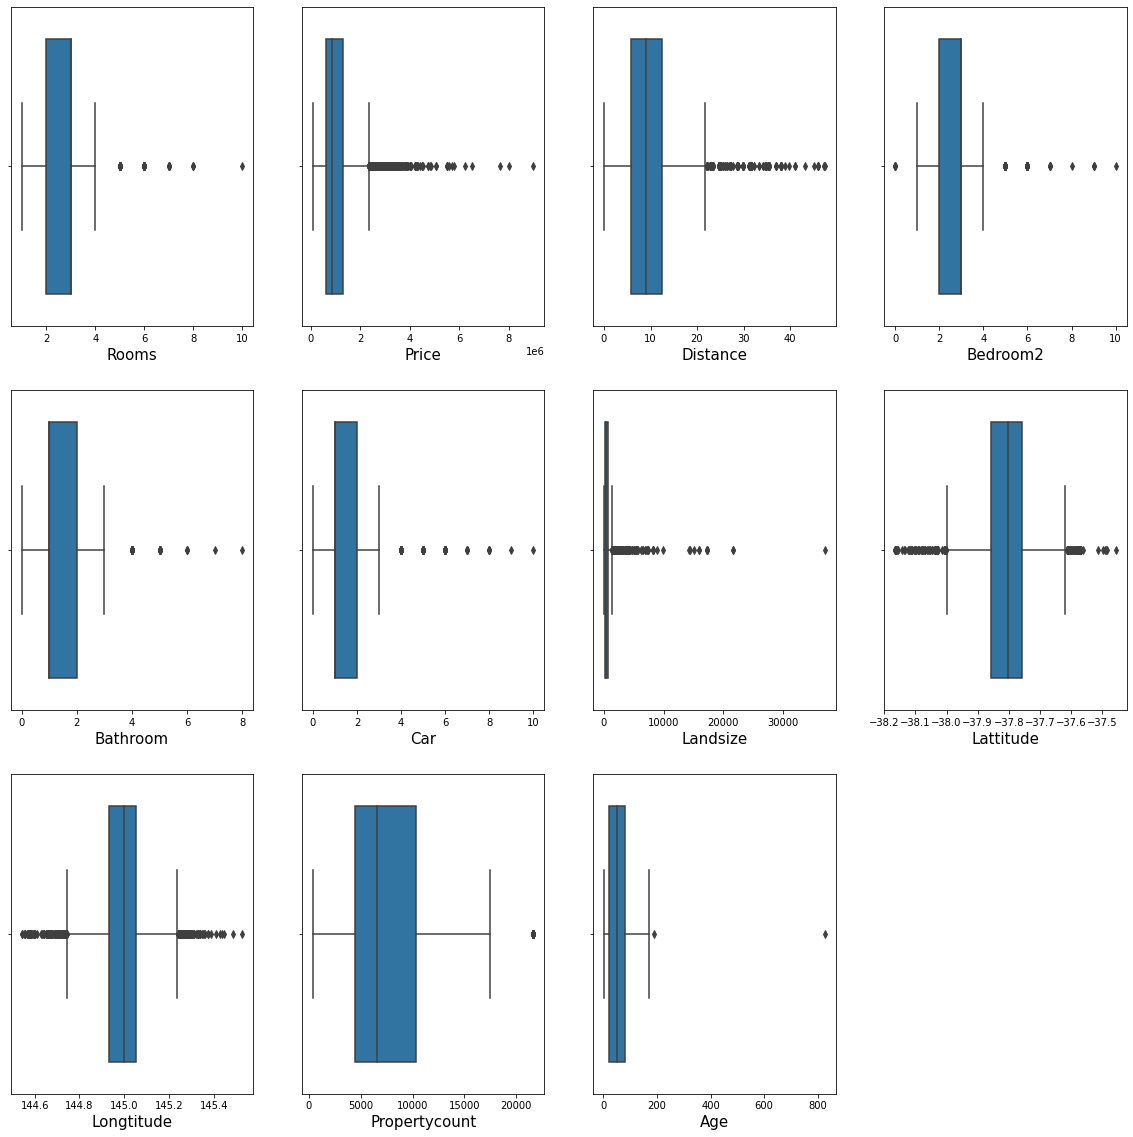

In [20]:
DFboxplot(data)

In [21]:
data=removeOutier(data,["Rooms","Price","Distance","Bedroom2","Bathroom","Car","Landsize","Lattitude","Longtitude","Propertycount","Age"])

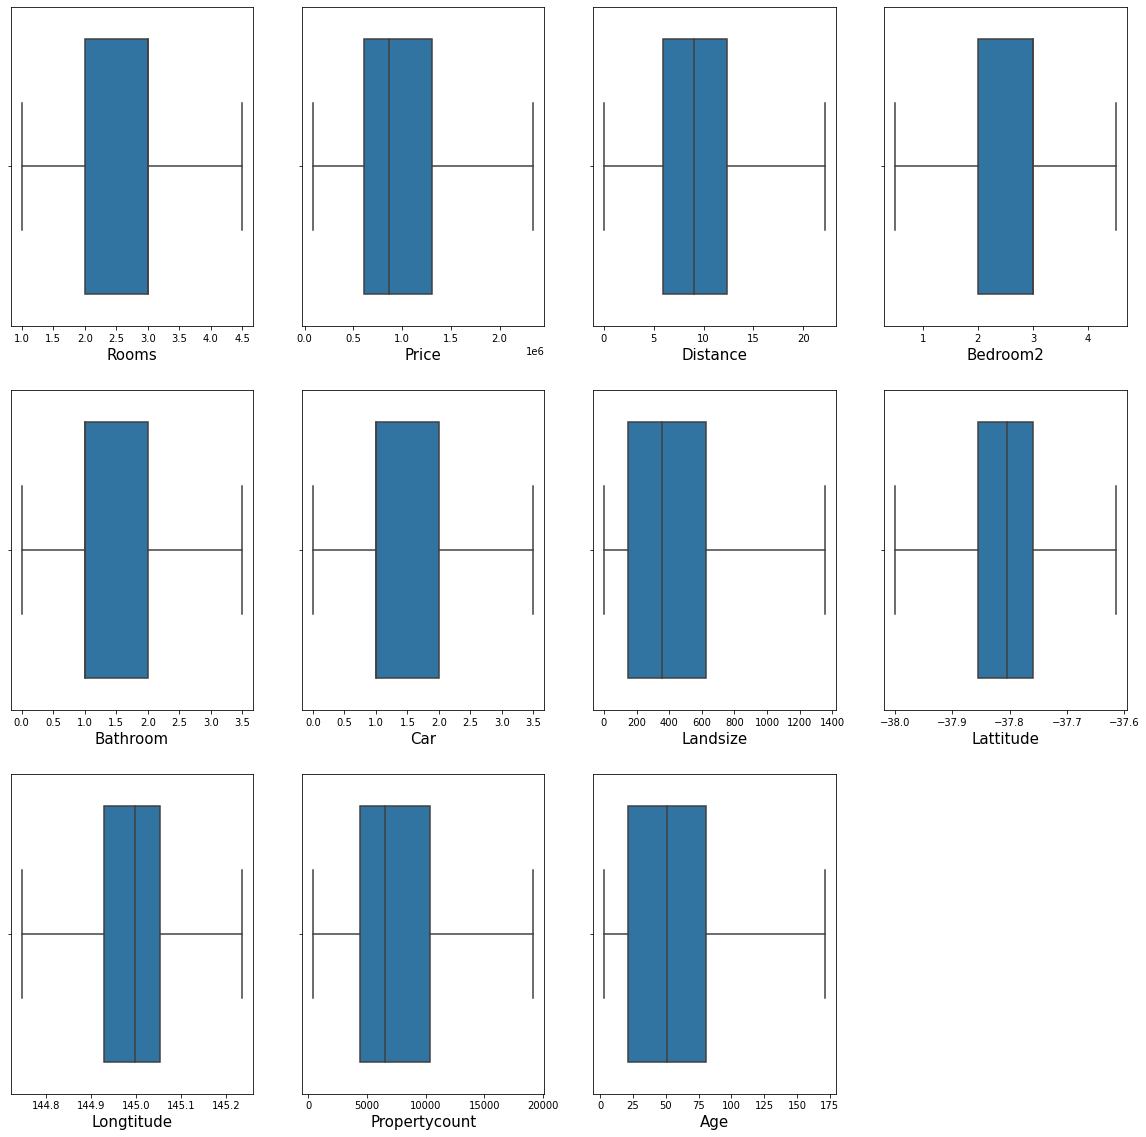

In [22]:
DFboxplot(data)

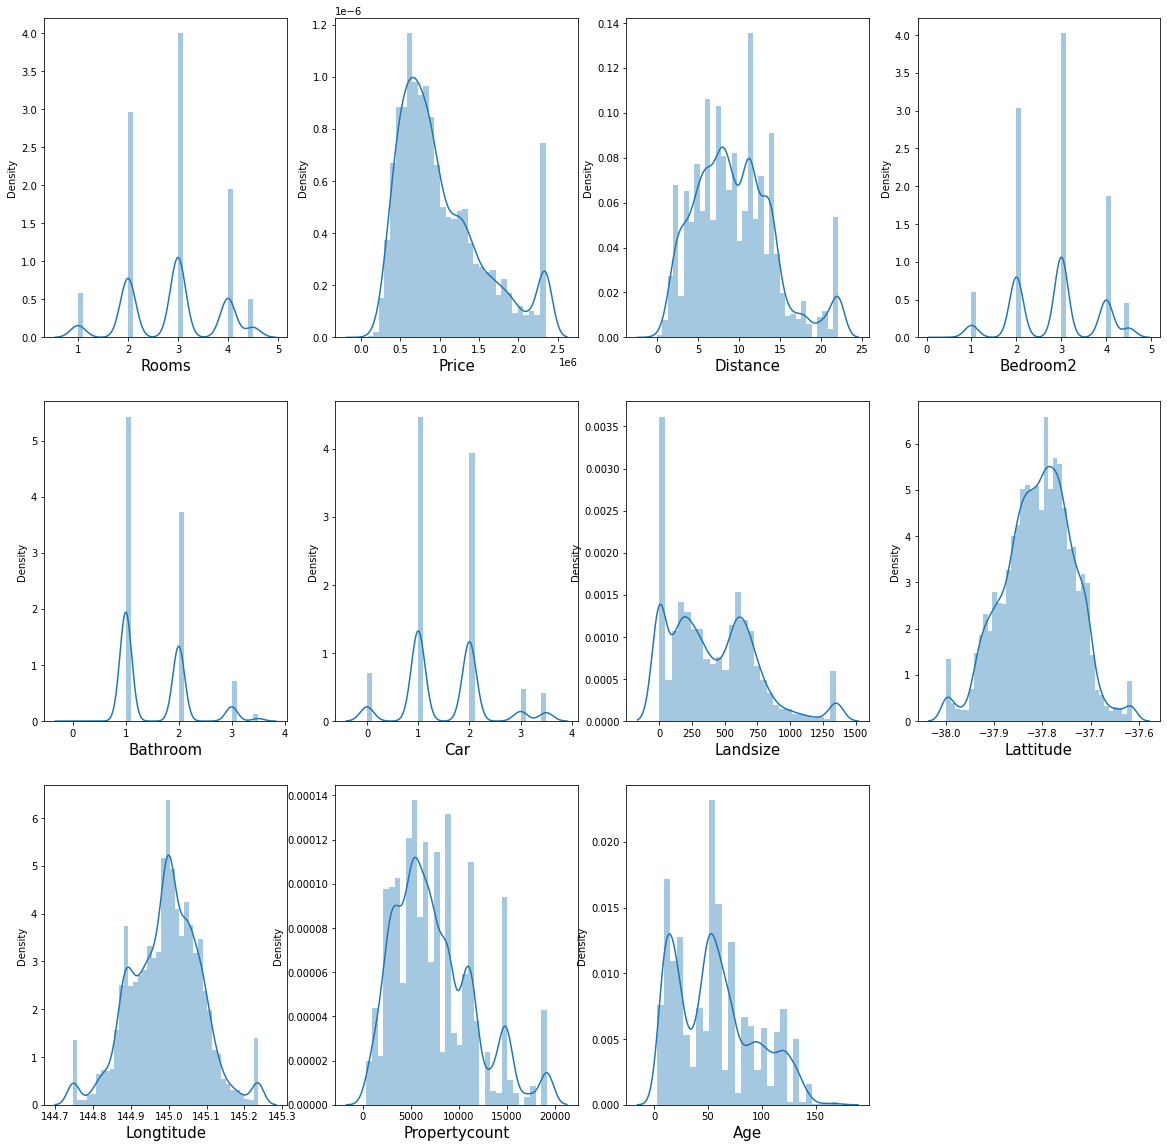

In [23]:
DFdistplot(data)

In [24]:
data

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Age,Date,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB
1,2.0,1035000.00,2.50,2.0,1.0,0.0,156.0,-37.80790,144.99340,4019.0,121.0,2016-04-02,0,0,1,0,0,0
2,3.0,1465000.00,2.50,3.0,2.0,0.0,134.0,-37.80930,144.99440,4019.0,121.0,2017-04-03,0,0,0,0,1,0
4,4.0,1600000.00,2.50,3.0,1.0,2.0,120.0,-37.80720,144.99410,4019.0,7.0,2016-04-06,0,0,0,0,0,1
6,3.0,1876000.00,2.50,4.0,2.0,0.0,245.0,-37.80240,144.99930,4019.0,111.0,2016-07-05,0,0,1,0,0,0
7,2.0,1636000.00,2.50,2.0,1.0,2.0,256.0,-37.80600,144.99540,4019.0,131.0,2016-08-10,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15388,3.0,601000.00,22.15,3.0,2.0,1.0,972.0,-37.61453,145.13282,2170.0,25.0,2017-07-29,0,0,1,0,0,0
15389,3.0,1050000.00,6.80,3.0,1.0,0.0,179.0,-37.86558,144.90474,6380.0,131.0,2017-07-29,0,0,0,0,0,1
15390,1.0,385000.00,6.80,1.0,1.0,1.0,0.0,-37.85588,144.89936,6380.0,54.0,2017-07-29,0,1,0,0,1,0
15392,2.0,560000.00,4.60,2.0,1.0,1.0,0.0,-37.85581,144.99025,4380.0,9.0,2017-07-29,0,1,0,0,0,0


In [25]:
## lets remove Date feature
data=data.drop(["Date"],axis=1)

In [26]:
# lets split the data into fetaaures and label
y=data["Price"]
X=data.drop(["Price"],axis=1)

In [27]:
## perform feature scaling
sc=StandardScaler()

In [28]:
col=X.columns
X=pd.DataFrame(sc.fit_transform(X),columns=col)

In [29]:
X.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Age,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB
0,-0.946133,-1.455916,-0.924361,-0.826463,-1.902529,-0.765706,0.009579,0.014333,-0.818799,1.776828,-0.326881,-0.606308,0.747100,-0.07969,-0.401509,-0.314918
1,0.159507,-1.455916,0.186782,0.685387,-1.902529,-0.832943,-0.009902,0.025277,-0.818799,1.776828,-0.326881,-0.606308,-1.338508,-0.07969,2.490601,-0.314918
2,1.265147,-1.455916,0.186782,-0.826463,0.597367,-0.875730,0.019320,0.021994,-0.818799,-1.354090,-0.326881,-0.606308,-1.338508,-0.07969,-0.401509,3.175426
3,0.159507,-1.455916,1.297924,0.685387,-1.902529,-0.493704,0.086114,0.078903,-0.818799,1.502186,-0.326881,-0.606308,0.747100,-0.07969,-0.401509,-0.314918
4,-0.946133,-1.455916,-0.924361,-0.826463,0.597367,-0.460085,0.036019,0.036221,-0.818799,2.051470,-0.326881,-0.606308,0.747100,-0.07969,-0.401509,-0.314918


In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=45)

In [33]:
import kerastuner as kt
from kerastuner import RandomSearch

In [47]:
def build_model(hp):
    model=Sequential()
    for i in range(hp.Int("num_layers",2,20)):
        model.add(Dense(units=hp.Int("unit"+str(i),min_value=32,max_value=512,step=32),activation='relu',
                        kernel_initializer='he_uniform'))
    model.add(Dense(1,activation='linear'))
    model.compile(loss="mean_absolute_error",optimizer='adam',metrics=["mean_absolute_error"])
    return model

In [48]:
tuner=RandomSearch(build_model,objective="mean_absolute_error",max_trials=5)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [38]:
tuner.search(X_train,y_train,epochs=5)

Trial 6 Complete [00h 00m 16s]
mse: 59859947520.0

Best mse So Far: 59859947520.0
Total elapsed time: 00h 00m 53s
INFO:tensorflow:Oracle triggered exit


In [39]:
models=tuner.get_best_models()
hps=tuner.get_best_hyperparameters()

In [41]:
model=models[0]
hp=hps[0]

In [42]:
model=build_model(hp)
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
187/187 [==============================] - 3s 12ms/step - loss: 233489760256.0000 - mse: 233489760256.0000
Epoch 2/100
187/187 [==============================] - 2s 12ms/step - loss: 77104398336.0000 - mse: 77104398336.0000: 1s - loss: 76096
Epoch 3/100
187/187 [==============================] - 2s 12ms/step - loss: 68559065088.0000 - mse: 68559065088.0000
Epoch 4/100
187/187 [==============================] - 2s 12ms/step - loss: 67223810048.0000 - mse: 67223810048.0000
Epoch 5/100
187/187 [==============================] - 2s 12ms/step - loss: 65479057408.0000 - mse: 65479057408.0000
Epoch 6/100
187/187 [==============================] - 2s 13ms/step - loss: 62559383552.0000 - mse: 62559383552.0000
Epoch 7/100
187/187 [==============================] - 2s 12ms/step - loss: 59264647168.0000 - mse: 59264647168.0000
Epoch 8/100
187/187 [==============================] - 2s 12ms/step - loss: 57557311488.0000 - mse: 57557311488.0000
Epoch 9/100
187/187 [=======================

187/187 [==============================] - 3s 14ms/step - loss: 12452006912.0000 - mse: 12452006912.0000
Epoch 68/100
187/187 [==============================] - 3s 14ms/step - loss: 11805068288.0000 - mse: 11805068288.0000
Epoch 69/100
187/187 [==============================] - 3s 14ms/step - loss: 16499246080.0000 - mse: 16499246080.0000
Epoch 70/100
187/187 [==============================] - 3s 15ms/step - loss: 11668920320.0000 - mse: 11668920320.0000
Epoch 71/100
187/187 [==============================] - 3s 15ms/step - loss: 10911218688.0000 - mse: 10911218688.0000
Epoch 72/100
187/187 [==============================] - 3s 14ms/step - loss: 14202532864.0000 - mse: 14202532864.0000
Epoch 73/100
187/187 [==============================] - 3s 14ms/step - loss: 10740969472.0000 - mse: 10740969472.0000
Epoch 74/100
187/187 [==============================] - 3s 14ms/step - loss: 10811064320.0000 - mse: 10811064320.0000
Epoch 75/100
187/187 [==============================] - 3s 15ms/step 

In [65]:
y_pred=model.predict(X_test)

In [72]:
a=[]
for i in range(0,y_pred.shape[0]):
    a.append(y_pred[i][0])
    

<AxesSubplot:xlabel='Price', ylabel='Density'>

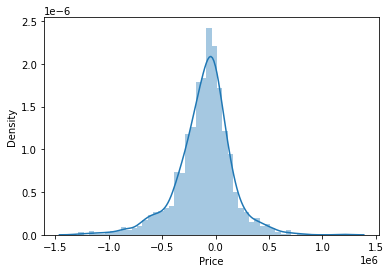

In [75]:
sns.distplot(y_test-a)

In [76]:
mean_squared_error(y_test,a)

77037875164.89755